# Neural & Behavioral Modeling - Week 9 (Exercises)
by 李彥廷 (b08207008@ntu.edu.tw)

In [164]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from numpy.linalg import inv
from matplotlib.pyplot import *
from IPython.display import *

## 1 A Two-layered Linear Network as a Regression Model (8 points)
Data fitting of the following network is poor. Please check if adding bias terms or changing network hyperparameters (e.g., learning rate, amount of training, etc.) help. If not, please explain why the fitting is poor given that the network/regression model has sufficient degrees of freedom (i.e., network weights or regression coefficients) to overfit such a small data set.

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.667 -0.   ]
 [ 0.666  0.   ]
 [ 1.333  0.   ]
 [-0.     0.666]
 [ 0.     0.666]
 [ 0.     1.331]]


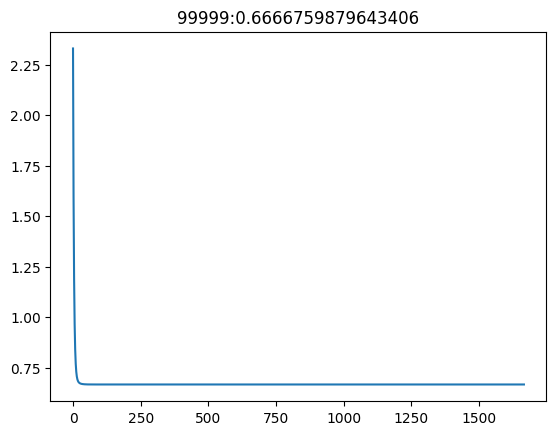

In [165]:
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions # (6,4)
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions # (6,2)
W=random.rand(Nx,Ny); # set initially random connectivity matrix

eta=.005; # set the learning rate 
tol=1e-4; # set the tolerance/stopping criterion; try 0.01
nIts=100000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose a traing pattern at random
    
    # Forward propagation:
    y=X[p].dot(W)
    
    # Backward propagation:
    deltaW=eta*outer(X[p],Y[p].T-y) # delta learning
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=X.dot(W) # testing ALL the training samples
        totErr=sum((Y-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY) # predicted Y

這個2-layered linear network可以寫成以下的矩陣形式：
  
$$
Y_{p \times m} = X_{p \times n} W_{n \times m} + \epsilon_{p \times m}
$$

$$
\begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
0 & 1 \\
0 & 1 \\
0 & 1 \\
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32} \\
w_{41} & w_{42} \\
\end{pmatrix}
+
\varepsilon
$$
  
而且這個linear regression model的解是有closed form的：
$$
W^\star = (X^TX)^{-1}X^{T}Y
$$ 
如果照這個公式算的話，可以發現經過上面的訓練後的weight已經幾乎是最佳解：

In [166]:
W_opt = inv(X.T@X)@X.T.dot(Y)
print('Optimal solution provided by closed form solution.')
print(W_opt)
print()
print('Solution provided by the network.')
print(W)

Optimal solution provided by closed form solution.
[[0.667 0.   ]
 [0.667 0.   ]
 [0.    0.667]
 [0.    0.667]]

Solution provided by the network.
[[ 0.666 -0.   ]
 [ 0.666  0.   ]
 [-0.     0.667]
 [ 0.     0.666]]


由於這個模型沒有包含bias term，代表他隱含了一個限制：當X一筆資料全為0，則y必須是[0,0]，即：  
$y_1 = w_{11}x_1+w_{21}x_1+w_{31}x_1+w_{41}x_4$  
$y_2 = w_{12}x_1+w_{22}x_1+w_{32}x_1+w_{42}x_4$  
  
由X的前三筆資料就可以看出，不可能有w可以滿足以上式子，所以一定會有residual的存在。  
$X_1$ = [1,0,0,0] -> $w_{11}$需要是1，$y_1$才會是1。    
$X_2$ = [0,1,0,0] -> $w_{21}$需要是1，$y_1$才會是1。    
$X_3$ = [1,1,0,0] -> $w_{11}+w_{21}=1$，$y_1$才會是1。  
然而$w_{11}=1$, $w_{21}=1$, $w_{11}+w_{21}=1$不會同時成立。

## A Two-layered Linear Network with bias term

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.834  0.166]
 [ 0.832  0.168]
 [ 1.166 -0.166]
 [ 0.168  0.832]
 [ 0.168  0.832]
 [-0.164  1.164]]


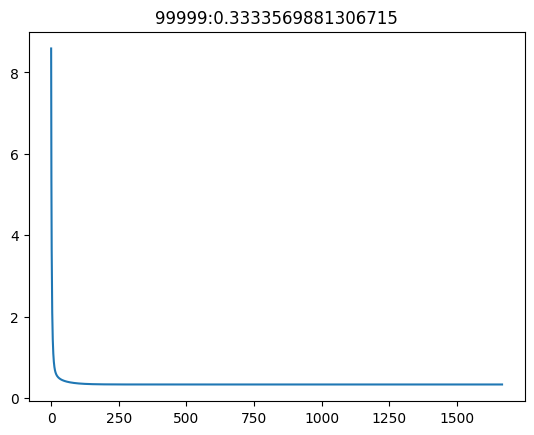

In [167]:
### Write your codes with bias terms here
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0,1],[0,1,0,0,1],[1,1,0,0,1],[0,0,1,0,1],[0,0,0,1,1],[0,0,1,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions # (6,4)
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions # (6,2)
W=random.rand(Nx,Ny); # set initially random connectivity matrix

eta=.005; # set the learning rate 
tol=1e-4; # set the tolerance/stopping criterion; try 0.01
nIts=100000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose a traing pattern at random
    
    # Forward propagation:
    y=X[p].dot(W)
    
    # Backward propagation:
    deltaW=eta*outer(X[p],Y[p].T-y) # delta learning
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=X.dot(W) # testing ALL the training samples
        totErr=sum((Y-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY) # predicted Y

這個加了biased term的2-layered linear network可以寫成以下的矩陣形式：  
  
$$
Y_{p \times m} = X_{p \times (n+1)} W_{(n+1)\times m} + \epsilon_{p \times m}
$$

$$
\begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
0 & 1 \\
0 & 1 \\
0 & 1 \\
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 1 \\
1 & 1 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 & 1 \\ 
0 & 0 & 0 & 1 & 1 \\
0 & 0 & 1 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32} \\
w_{41} & w_{42} \\
b_1 & b_2
\end{pmatrix}
+
\varepsilon
$$

這個linear regression model的解的closed form也是：
$
W^\star = (X^TX)^{-1}X^{T}Y
$  
依照weight的最佳解公式算的話，最佳解如下：

In [168]:
W_opt = inv(X.T@X)@X.T.dot(Y)
print('Optimal solution provided by closed form solution.')
print(W_opt)
print()
print('Solution provided by the network.')
print(W)

Optimal solution provided by closed form solution.
[[ 0.333 -0.333]
 [ 0.333 -0.333]
 [-0.333  0.333]
 [-0.333  0.333]
 [ 0.5    0.5  ]]

Solution provided by the network.
[[ 0.333 -0.333]
 [ 0.332 -0.332]
 [-0.334  0.334]
 [-0.332  0.332]
 [ 0.5    0.5  ]]


## Comparison of two model

這兩個model都可以被視為兩個linear regression model合在一起  
$y_1 = w_{11}x_1+w_{21}x_1+w_{31}x_1+w_{41}x_4(+b_{1})$  
$y_2 = w_{12}x_1+w_{22}x_1+w_{32}x_1+w_{42}x_4(+b_{2})$  
我們有六筆資料，然後分別有4個weight(和1個bias)要估計，總共四(五)個參數，自由度大於0，所以應該會有residual才對。
model要just-identified才可以達到ideal的fit (overfit)，但是這樣的資料還有模型不可能。